# Accumulated FuncAnimation examples using javascript translation

## Notes

* HTML seems to return an HTML object.  So can we put that in an HTML widget?
* Looks like you can put `HTML(ani.to_jshtml())` inside `display()` and get the same result.
* Good explanation: https://brushingupscience.com/2016/06/21/matplotlib-animations-the-easy-way/
* A good talk: http://sam-dolan.staff.shef.ac.uk/2016/mas212/docs/l9.pdf which has oscillator animations (like van der Pol).

In [1]:
%matplotlib inline


# Oscilloscope


Emulates an oscilloscope.

*At the moment doesn't work to show a blip, just a flat line.*



In [2]:
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from IPython.display import display

class Scope(object):
    def __init__(self, ax, maxt=2, dt=0.02):
        self.ax = ax
        self.dt = dt
        self.maxt = maxt
        self.tdata = [0]
        self.ydata = [0]
        self.line = Line2D(self.tdata, self.ydata)
        self.ax.add_line(self.line)
        self.ax.set_ylim(-.1, 1.1)
        self.ax.set_xlim(0, self.maxt)

    def update(self, y):
        lastt = self.tdata[-1]
        if lastt > self.tdata[0] + self.maxt:  # reset the arrays
            self.tdata = [self.tdata[-1]]
            self.ydata = [self.ydata[-1]]
            self.ax.set_xlim(self.tdata[0], self.tdata[0] + self.maxt)
            self.ax.figure.canvas.draw()

        t = self.tdata[-1] + self.dt
        self.tdata.append(t)
        self.ydata.append(y)
        self.line.set_data(self.tdata, self.ydata)
        return self.line,


def emitter(p=0.03):
    'return a random value with probability p, else 0'
    while True:
        v = np.random.rand(1)
        if v > p:
            yield 0.
        else:
            yield np.random.rand(1)

# Fixing random state for reproducibility
np.random.seed(19680801)


fig, ax = plt.subplots()
plt.close()  # to keep a blank figure from appearing
scope = Scope(ax)

# pass a generator in "emitter" to produce data for the update func
ani = FuncAnimation(fig, scope.update, emitter, interval=10,
                              blit=True)

from IPython.display import HTML
HTML(ani.to_jshtml())


### Another one

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np
from matplotlib import animation
N = 5
M = 100
points_evo_array = np.random.rand(M,N)

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, M), ylim=(0, np.max(points_evo_array)))
plt.close()  # prevent a blank plot (doesn't clear the fig or ax)

lines = []

lines = [ax.plot([], [])[0] for _ in range(N)]

def init():    
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    for j,line in enumerate(lines):
        line.set_data(range(i), [points_evo_array[:i,j]])
    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, np.arange(1, M), init_func=init, interval=20, blit=True)

#HTML(anim.to_html5_video())
HTML(anim.to_jshtml())


### Follow the dot on a function

We'll first try one, then two plots

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams["animation.html"] = "jshtml"

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
l, = ax.plot(t,x)
l2, = ax.plot(t[0],x[0],'ro')
plt.close()  # prevent a blank plot (doesn't clear the fig or ax)

def animate(i):
    l2.set_data(t[i], x[i])

ani = FuncAnimation(fig=fig, func=animate, frames=len(t), interval=40)

HTML(ani.to_jshtml())


Now two side-by-side subplots.  It works!!

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams["animation.html"] = "jshtml"

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

t = np.linspace(0,2*np.pi)
x = np.sin(t)
xsq = x**2

fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
l, = ax1.plot(t,x)
l2, = ax1.plot(t[0],x[0],'ro')
ax2 = fig.add_subplot(2,1,2)
l3 = ax2.plot(t,xsq)
l4, = ax2.plot(t[0],xsq[0],'ro')
plt.close()  # prevent a blank plot (doesn't clear the fig or ax)

def animate(i):
    l2.set_data(t[i], x[i])
    l4.set_data(t[i], xsq[i])
    return l2,l4   # return these so that we can set blit=True

# interval is in milliseconds (I think)
ani2 = FuncAnimation(fig=fig, func=animate, frames=len(t), interval=40, blit=True)

HTML(ani2.to_jshtml())


### Try (and fail) to display in a widget

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams["animation.html"] = "jshtml"

from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTML, HTMLMath 

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
l, = ax.plot(t,x)
l2, = ax.plot(t[0],x[0],'ro')
plt.close()  # prevent a blank plot (doesn't clear the fig or ax)

def animate(i):
    l2.set_data(t[i], x[i])

ani = FuncAnimation(fig=fig, func=animate, frames=len(t), interval=40)

#HTML_w = widgets.HTML(HTML(ani.to_jshtml()))
HTML_w = widgets.HTML(ani.to_jshtml())
text_w = widgets.Text('This is a test.')
#output_w = widgets.Output(HTML(ani.to_jshtml()))

everything = widgets.VBox([text_w, HTML_w])
display(everything)

In [ ]:
# An example with threading, but can we just take the widget.Output part?
# %matplotlib inline

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# from IPython.display import display, HTML
# import ipywidgets as widgets
# import threading


# t = np.linspace(0,2*np.pi)
# x = np.sin(t)

# fig, ax = plt.subplots()
# l, = ax.plot(t,x)
# l2, = ax.plot(t[0],x[0],'ro')
# plt.close()  # prevent a blank plot (doesn't clear the fig or ax)

# def animate(i):
#     l2.set_data(t[i], x[i])

# ani = FuncAnimation(fig=fig, func=animate, frames=len(t), interval=40)

# out = widgets.Output()

# def foo():
#     with out:
#         display(HTML(ani.to_jshtml()))

# threading.Thread(target=foo).start()

# out

### From Matplotlib's Animation page

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML

fig, ax = plt.subplots()
xdata, ydata = [], []
#ln, = plt.plot([], [], 'ro', animated=True)
ln, = plt.plot([], [], animated=True)
ln2, = plt.plot([], [], 'ro', animated=True)
plt.close()

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)  # put another index on
    ydata.append(np.sin(frame))  # take the sin
    ln.set_data(xdata, ydata)
    ln2.set_data(frame, np.sin(frame))
    return ln,ln2

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True, interval=20)

HTML(ani.to_jshtml())


### Trying ArtistAnimation

E.g., generate images and then display in widgets.

See if this helps: https://gist.github.com/jakevdp/c7a27b31bade6b4a41718a76305b5054?short_path=9c27acb

I'm not sure it's thoroughly documented anywhere, but the animated state of an artist controls whether or not it's included when drawing the plot.

If animated is True, then the artist will not be drawn when fig.draw() is called. Instead, it will only be drawn when you manually call draw_artist(artist_with_animated_set). This allows for simplification of blitting functions.

Note: This does not apply to all backends! I think it applies to almost all interactive backends, but it doesn't apply to non-interactive backends. It's intended to be used in combination with blitting, so backends that don't support blitting don't support the animated flag.

For example, if we do something similar to this:

`import matplotlib.pyplot as plt`

`fig, ax = plt.subplots()
ax.plot(range(10), animated=True)
plt.show()`

We'll get a blank plot -- the line will not be drawn. (Note: If you save this figure, the line will show up. See the caveat about non-interactive backends above. Matplotlib temporarily switches to a non interactive backend to save a figure.)

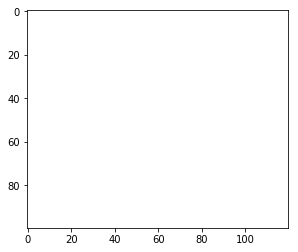

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# ani.save('dynamic_images.mp4')

plt.show()
